In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#target and features to array
y_train = train['label'].values
x_train = train.drop(labels=['label'], axis=1).values
test = test.values

In [8]:
def reshape_and_normalize(images):
    # Normalize pixel values
    images = images/max(images[0])
    
    # Reshape the images to add an extra dimension
    images = images.reshape(-1, 28, 28, 1)
  
    return images

#Normalize
X_train = reshape_and_normalize(x_train)
X_test = reshape_and_normalize(test)

print(f"Maximum pixel value after normalization: {np.max(X_train)}\n")
print(f"Shape of training set after reshaping: {X_train.shape}\n")
print(f"Shape of one image after reshaping: {X_train[0].shape}")

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (42000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
            
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:                 
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state = 2)

In [11]:
def tensor_simple_model(x_train, y_train):
    
    callbacks = myCallback()
    
    model = tf.keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),  # Camada de achatamento para converter a imagem em um vetor
        keras.layers.Dense(128, activation='relu'),  # Camada densa com ativação 'relu'
        keras.layers.Dense(10, activation='softmax')  # Camada de saída com ativação 'softmax' para classificação multiclasse
    ])
    
    # Compile the model
    model.compile(optimizer='adam',                   
                  loss='sparse_categorical_crossentropy',                   
                  metrics=['accuracy'])     
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks], batch_size=64)
    
    return history, model

In [12]:
history, model = tensor_simple_model(X_train, y_train)

Epoch 1/10
591/591 [==============================] - 2s 2ms/step - loss: 0.3650 - accuracy: 0.8991
Epoch 2/10
591/591 [==============================] - 1s 2ms/step - loss: 0.1700 - accuracy: 0.9522
Epoch 3/10
591/591 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9653
Epoch 4/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9727
Epoch 5/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 6/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0573 - accuracy: 0.9828
Epoch 7/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0469 - accuracy: 0.9866
Epoch 8/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9893
Epoch 9/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9923
Epoch 10/10
591/591 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9934

In [13]:
def plot_loss_and_accuracy(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    plt.figure(figsize=(10, 4))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

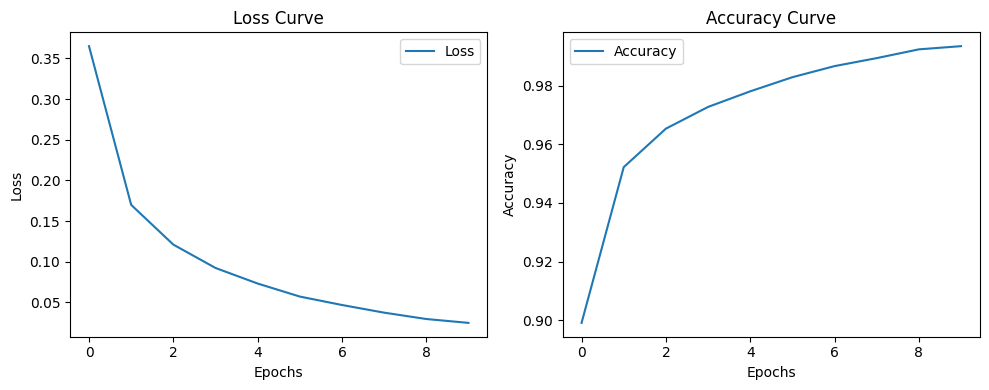

In [14]:
plot_loss_and_accuracy(history)

In [15]:
def convolutional_model():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [16]:
# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1182/1182 [==============================] - 22s 18ms/step - loss: 0.1350 - accuracy: 0.9579
Epoch 2/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 3/10
1182/1182 [==============================] - 23s 19ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 4/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 5/10
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 6/10
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0124 - accuracy: 0.9961
Epoch 7/10
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0123 - accuracy: 0.9959
Epoch 8/10
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0095 - accuracy: 0.9967
Epoch 9/10
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0085 - accuracy: 0.9975
Epoch 10/10
1182/1182 [==============================] - 21s 18m

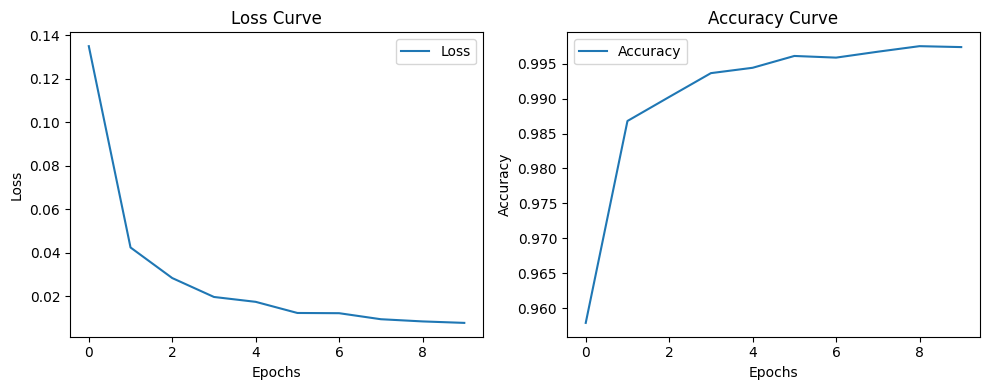

In [17]:
plot_loss_and_accuracy(history)

In [18]:
y_test_pred = model.predict(X_test)

875/875 [==============================] - 5s 6ms/step
